In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que los gráficos se muestren en el notebook
%matplotlib inline

sns.set_theme(style="whitegrid")

In [2]:
# Cargar el dataset
df = pd.read_csv('../data/raw/train.csv')

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Crear la columna Survived_str a partir de Survived
df['Survived_str'] = df['Survived'].map({0: 'No', 1: 'Sí'})

In [4]:
# Ver información general del DataFrame: tipos de datos y valores no nulos
print("Información del DataFrame:")
df.info()

print("\n" + "="*50 + "\n")

# Ver estadísticas descriptivas de las columnas numéricas
print("Estadísticas descriptivas:")
df.describe()

print("\n" + "="*50 + "\n")

# Contar valores nulos por columna
print("Conteo de valores nulos:")
df.isnull().sum()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Survived_str  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Estadísticas descriptivas:


Conteo de valores nulos:


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Survived_str      0
dtype: int64

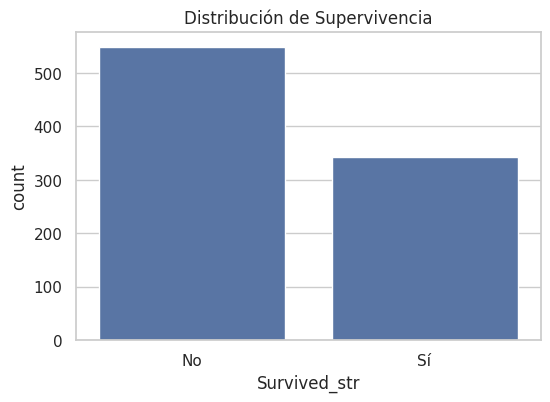

Survived_str
No    61.616162
Sí    38.383838
Name: proportion, dtype: float64


In [5]:
# Gráfico de la distribución de la variable 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived_str', data=df)
plt.title('Distribución de Supervivencia')
plt.show()

# Imprimir los porcentajes
print(df['Survived_str'].value_counts(normalize=True) * 100)

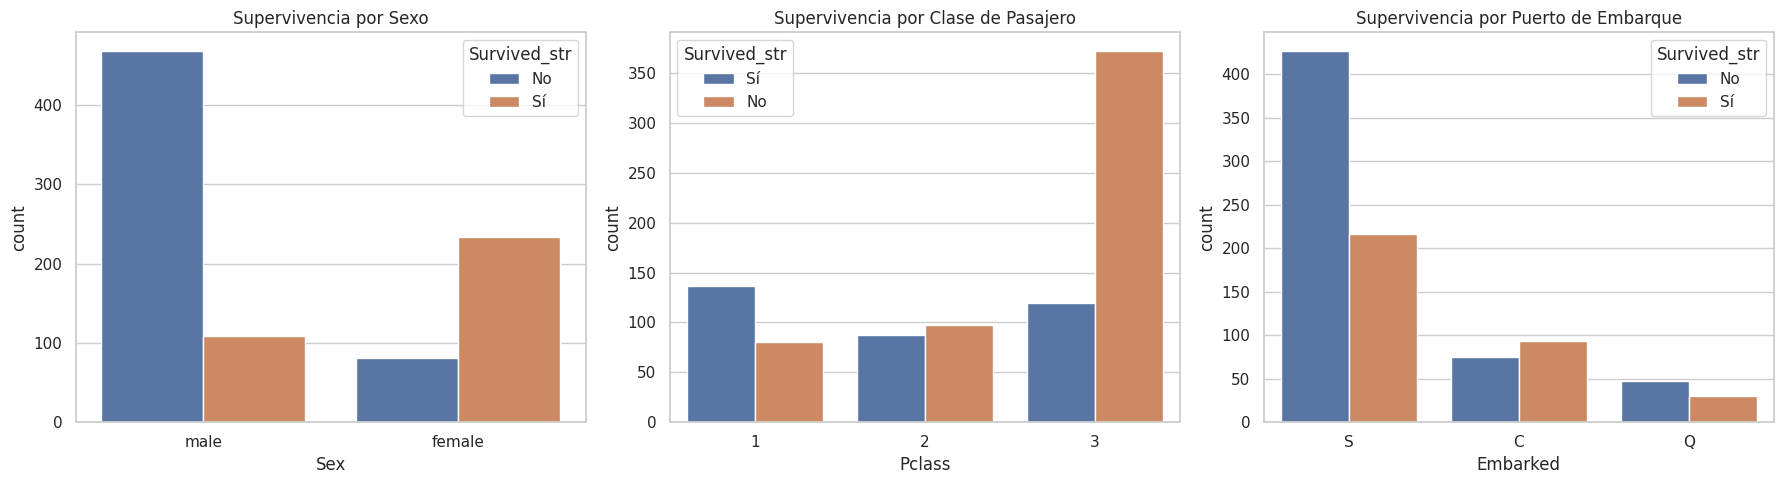

In [6]:
# Crear una figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Supervivencia por Sexo
sns.countplot(x='Sex', hue='Survived_str', data=df, ax=axes[0])
axes[0].set_title('Supervivencia por Sexo')

# Gráfico 2: Supervivencia por Clase (Pclass)
sns.countplot(x='Pclass', hue='Survived_str', data=df, ax=axes[1])
axes[1].set_title('Supervivencia por Clase de Pasajero')

# Gráfico 3: Supervivencia por Puerto de Embarque
sns.countplot(x='Embarked', hue='Survived_str', data=df, ax=axes[2])
axes[2].set_title('Supervivencia por Puerto de Embarque')

plt.tight_layout()
plt.show()

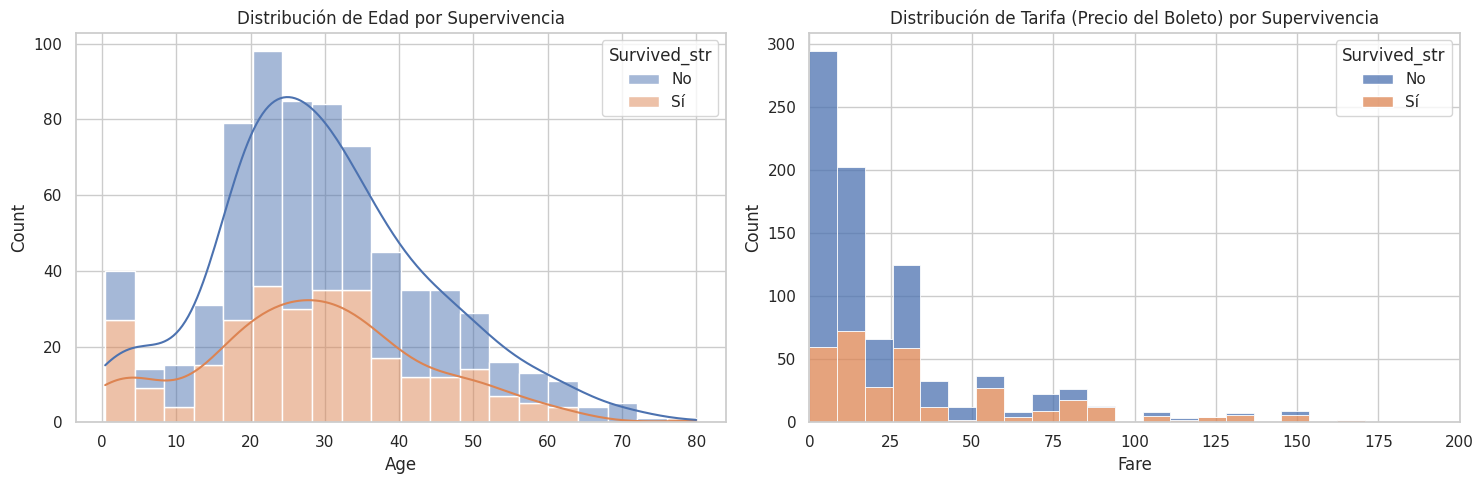

In [7]:
# Crear una figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Distribución de Edad por Supervivencia
sns.histplot(data=df, x='Age', hue='Survived_str', multiple='stack', kde=True, ax=axes[0])
axes[0].set_title('Distribución de Edad por Supervivencia')

# Gráfico 2: Distribución de Tarifa por Supervivencia
sns.histplot(data=df, x='Fare', hue='Survived_str', multiple='stack', ax=axes[1])
axes[1].set_title('Distribución de Tarifa (Precio del Boleto) por Supervivencia')
axes[1].set_xlim(0, 200) # Limitar el eje x para mejor visualización

plt.tight_layout()
plt.show()